In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
from datetime import datetime 

In [2]:
df = pd.read_pickle('starter.pkl')

In [3]:
df = df.reset_index(drop=True)
df

,created_at,collected_at,default_profile,default_profile_image,favourites_count,followers_count,friends_count,listed_count,protected,statuses_count,verified,label
0,Thu Jun 07 22:16:27 +0000 2012,2018-04-16 19:28:33+00:00,0.0,False,12898,790,3218,42,0.0,6252,0.0,human
1,Sun Nov 13 01:48:58 +0000 2016,2018-04-18 12:55:26+00:00,0.0,False,10835,16039,10960,18,0.0,14885,0.0,bot
2,Thu Oct 18 23:19:38 +0000 2012,2018-04-17 23:07:08+00:00,0.0,False,3116,7618,7800,118,0.0,7376,0.0,human
3,Sat Dec 12 22:53:04 +0000 2009,2018-04-18 12:58:28+00:00,0.0,False,1728,388,674,6,0.0,48933,0.0,bot
4,Wed Oct 22 13:43:42 +0000 2008,2018-04-18 14:09:01+00:00,0.0,False,5946,19677,13611,612,0.0,62922,0.0,human
...,...,...,...,...,...,...,...,...,...,...,...,...
126552,Tue Sep 22 03:10:00 +0000 2009,2019-06-05 12:26:47+00:00,0.0,False,1707,3020,790,18,0.0,4671,1.0,human
126553,Sun Oct 27 17:46:59 +0000 2013,2019-06-05 22:07:56+00:00,0.0,False,4777,4074,4239,163,0.0,712,1.0,human
126554,Fri Mar 20 16:12:36 +0000 2009,2019-06-05 14:16:01+00:00,0.0,False,7765,17014,2610,608,0.0,17452,1.0,human
126555,Sun May 31 06:37:34 +0000 2009,2019-06-05 16:33:33+00:00,0.0,False,10282,367516,20245,5470,0.0,158301,1.0,human


In [4]:
df['collected_at'] = pd.to_datetime(df['collected_at'], utc=True)
df['created_at'] = pd.to_datetime(df['created_at'], utc=True)

# account age (in days) at collection 
df['age_at_collection'] = df['collected_at'] - df['created_at']
df['age_at_collection'] = pd.to_numeric(df['age_at_collection'].dt.days)

# convert to binary
df['default_profile_image'] = pd.to_numeric(df['default_profile_image'])
df['label'] = df['label'].map({'human':0, 'bot':1})

In [5]:
df

,created_at,collected_at,default_profile,default_profile_image,favourites_count,followers_count,friends_count,listed_count,protected,statuses_count,verified,label,age_at_collection
0,2012-06-07 22:16:27+00:00,2018-04-16 19:28:33+00:00,0.0,0.0,12898,790,3218,42,0.0,6252,0.0,0.0,2138
1,2016-11-13 01:48:58+00:00,2018-04-18 12:55:26+00:00,0.0,0.0,10835,16039,10960,18,0.0,14885,0.0,1.0,521
2,2012-10-18 23:19:38+00:00,2018-04-17 23:07:08+00:00,0.0,0.0,3116,7618,7800,118,0.0,7376,0.0,0.0,2006
3,2009-12-12 22:53:04+00:00,2018-04-18 12:58:28+00:00,0.0,0.0,1728,388,674,6,0.0,48933,0.0,1.0,3048
4,2008-10-22 13:43:42+00:00,2018-04-18 14:09:01+00:00,0.0,0.0,5946,19677,13611,612,0.0,62922,0.0,0.0,3465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126552,2009-09-22 03:10:00+00:00,2019-06-05 12:26:47+00:00,0.0,0.0,1707,3020,790,18,0.0,4671,1.0,0.0,3543
126553,2013-10-27 17:46:59+00:00,2019-06-05 22:07:56+00:00,0.0,0.0,4777,4074,4239,163,0.0,712,1.0,0.0,2047
126554,2009-03-20 16:12:36+00:00,2019-06-05 14:16:01+00:00,0.0,0.0,7765,17014,2610,608,0.0,17452,1.0,0.0,3728
126555,2009-05-31 06:37:34+00:00,2019-06-05 16:33:33+00:00,0.0,0.0,10282,367516,20245,5470,0.0,158301,1.0,0.0,3657


In [6]:
# lots of nulls, need to find a way to deal with them
# default profile image is especially problematic since an entire dataset is missing it
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

default_profile          11255
default_profile_image    66759
protected                19783
verified                 16307
label                       10
dtype: int64

In [7]:
# default_profile is interesting
# 67k bots, 12k humans have default profiles, 11.2k values missing
# we definitely want to capture this with more nuance than defaulting
# to 1 or 0, so let's try KNN imputation AFTER the train_test_split in our modeling nb


# drop default_profile_image column since we have so much missing data 
# only 600 total and split across labels anyway
df = df.drop(columns=['default_profile_image'])

# only 78 protected accounts in 100k+ rows, all human
# let's just set missing values to 0
df['protected'] = df['protected'].fillna(0)

# verified status has 16k humans in our dataset 
# our data is already biased because of the presence of celebrities
# 16k/120k verified is VERY unrepresentative of the true ratio
# let's weigh down verification a bit by assuming none of them are verified
# we can consider imputation later, maybe KNN imputation 
df['verified'] = df['verified'].fillna(0)

# drop rows with missing labels
df = df.dropna(subset=['label'])

null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

default_profile    11255
dtype: int64

In [8]:
df['default_profile'].describe()

count    115292.000000
mean          0.667254
std           0.471199
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: default_profile, dtype: float64

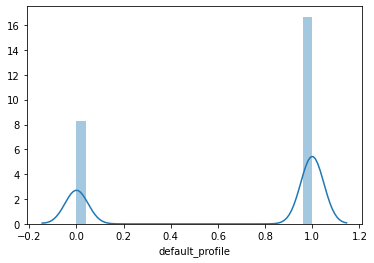

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['default_profile'])

In [10]:
drop_cols = ['created_at', 'collected_at']
final_df = df.drop(columns=drop_cols)
final_df

,default_profile,favourites_count,followers_count,friends_count,listed_count,protected,statuses_count,verified,label,age_at_collection
0,0.0,12898,790,3218,42,0.0,6252,0.0,0.0,2138
1,0.0,10835,16039,10960,18,0.0,14885,0.0,1.0,521
2,0.0,3116,7618,7800,118,0.0,7376,0.0,0.0,2006
3,0.0,1728,388,674,6,0.0,48933,0.0,1.0,3048
4,0.0,5946,19677,13611,612,0.0,62922,0.0,0.0,3465
...,...,...,...,...,...,...,...,...,...,...
126552,0.0,1707,3020,790,18,0.0,4671,1.0,0.0,3543
126553,0.0,4777,4074,4239,163,0.0,712,1.0,0.0,2047
126554,0.0,7765,17014,2610,608,0.0,17452,1.0,0.0,3728
126555,0.0,10282,367516,20245,5470,0.0,158301,1.0,0.0,3657


In [11]:
bot_df = final_df[final_df['label']==1]
human_df = final_df[final_df['label']==0]

In [12]:
bot_df.describe().round()

,default_profile,favourites_count,followers_count,friends_count,listed_count,protected,statuses_count,verified,label,age_at_collection
count,74339.0,81754.0,81754.0,81754.0,81754.0,81754.0,81754.0,81754.0,81754.0,81754.0
mean,1.0,676.0,11545.0,1310.0,42.0,0.0,3217.0,0.0,1.0,839.0
std,0.0,8029.0,382757.0,29011.0,1437.0,0.0,37187.0,0.0,0.0,1011.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,1.0
50%,1.0,3.0,5.0,2.0,0.0,0.0,40.0,0.0,1.0,202.0
75%,1.0,192.0,25.0,101.0,0.0,0.0,126.0,0.0,1.0,1669.0
max,1.0,886115.0,42709246.0,4249178.0,198862.0,0.0,2766520.0,1.0,1.0,4436.0


We're gonna run into some clear issues here with the skew from these massively active accounts -- the majority of bots have no favorites, followers or friends, but our mean/std are being massively skewed by a few top-heavy accounts.

count    81754.000000
mean         2.117528
std          2.258655
min          0.000000
25%          0.000000
50%          1.791759
75%          3.258097
max         17.569926
Name: followers_count, dtype: float64
count    81754.000000
mean         2.660767
std          2.893348
min          0.000000
25%          0.000000
50%          1.386294
75%          5.262690
max         13.694603
Name: favourites_count, dtype: float64
count    81754.000000
mean         2.391183
std          2.643764
min          0.000000
25%          0.000000
50%          1.098612
75%          4.624973
max         15.262236
Name: friends_count, dtype: float64


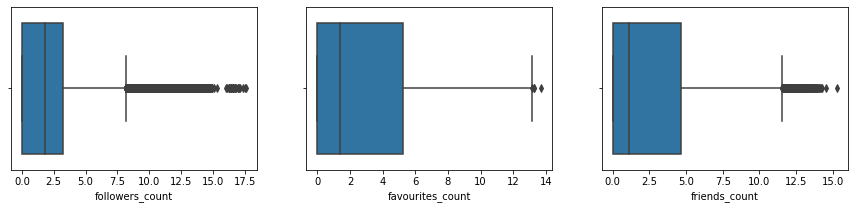

In [13]:
# Log scale, bot data
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.boxplot(bot_df['followers_count'].apply(lambda x: np.log(x+1)), ax=ax1)
sns.boxplot(bot_df['favourites_count'].apply(lambda x: np.log(x+1)), ax=ax2)
sns.boxplot(bot_df['friends_count'].apply(lambda x: np.log(x+1)), ax=ax3)

print(bot_df['followers_count'].apply(lambda x: np.log(x+1)).describe())
print(bot_df['favourites_count'].apply(lambda x: np.log(x+1)).describe())
print(bot_df['friends_count'].apply(lambda x: np.log(x+1)).describe())



In [14]:
human_df.describe().round()

,default_profile,favourites_count,followers_count,friends_count,listed_count,protected,statuses_count,verified,label,age_at_collection
count,40953.0,44793.0,44793.0,44793.0,44793.0,44793.0,44793.0,44793.0,44793.0,44793.0
mean,0.0,7647.0,524634.0,5524.0,1505.0,0.0,26107.0,0.0,0.0,2415.0
std,0.0,21095.0,2807603.0,49651.0,16940.0,0.0,120359.0,0.0,0.0,987.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,220.0,299.0,154.0,3.0,0.0,1959.0,0.0,0.0,1743.0
50%,0.0,1522.0,4809.0,442.0,69.0,0.0,7243.0,0.0,0.0,2620.0
75%,1.0,6130.0,180893.0,1193.0,703.0,0.0,22244.0,1.0,0.0,3218.0
max,1.0,910116.0,108990846.0,4458422.0,3233474.0,1.0,16158220.0,1.0,0.0,4710.0


count    44793.000000
mean         8.778634
std          3.828345
min          0.000000
25%          5.703782
50%          8.478452
75%         12.105667
max         18.506774
Name: followers_count, dtype: float64
count    44793.000000
mean         6.884149
std          2.586017
min          0.000000
25%          5.398163
50%          7.328437
75%          8.721113
max         13.721328
Name: favourites_count, dtype: float64
count    44793.000000
mean         5.932715
std          2.168638
min          0.000000
25%          5.043425
50%          6.093570
75%          7.085064
max         15.310306
Name: friends_count, dtype: float64


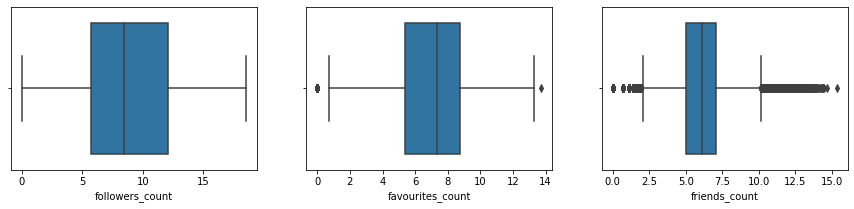

In [15]:
# Log scale, human data
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.boxplot(human_df['followers_count'].apply(lambda x: np.log(x+1)), ax=ax1)
sns.boxplot(human_df['favourites_count'].apply(lambda x: np.log(x+1)), ax=ax2)
sns.boxplot(human_df['friends_count'].apply(lambda x: np.log(x+1)), ax=ax3)

print(human_df['followers_count'].apply(lambda x: np.log(x+1)).describe())
print(human_df['favourites_count'].apply(lambda x: np.log(x+1)).describe())
print(human_df['friends_count'].apply(lambda x: np.log(x+1)).describe())

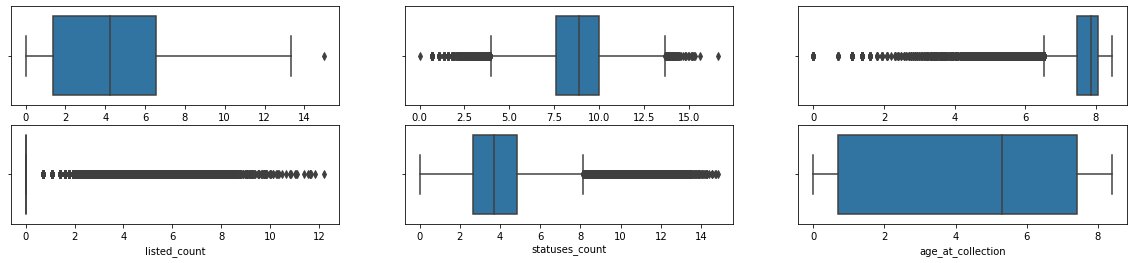

In [16]:
fig, axs = plt.subplots(2,3, figsize=(20,4))
sns.boxplot(human_df['listed_count'].apply(lambda x: np.log(x+1)), ax=axs[0,0])
sns.boxplot(human_df['statuses_count'].apply(lambda x: np.log(x+1)), ax=axs[0,1])
sns.boxplot(human_df['age_at_collection'].apply(lambda x: np.log(x+1)), ax=axs[0,2])

sns.boxplot(bot_df['listed_count'].apply(lambda x: np.log(x+1)), ax=axs[1,0])
sns.boxplot(bot_df['statuses_count'].apply(lambda x: np.log(x+1)), ax=axs[1,1])
sns.boxplot(bot_df['age_at_collection'].apply(lambda x: np.log(x+1)), ax=axs[1,2])

In [17]:
# bot_df['statuses_count'].apply(lambda x: np.log(x+1)).describe()
human_df['statuses_count'].describe().round()

count       44793.0
mean        26107.0
std        120359.0
min             0.0
25%          1959.0
50%          7243.0
75%         22244.0
max      16158220.0
Name: statuses_count, dtype: float64

In [18]:
final_df.pivot(columns='label').sum()

                   label
default_profile    0.0      1.024400e+04
                   1.0      6.668500e+04
favourites_count   0.0      3.425177e+08
                   1.0      5.525944e+07
followers_count    0.0      2.349992e+10
                   1.0      9.438455e+08
friends_count      0.0      2.474338e+08
                   1.0      1.070655e+08
listed_count       0.0      6.742244e+07
                   1.0      3.468787e+06
protected          0.0      7.800000e+01
                   1.0      0.000000e+00
statuses_count     0.0      1.169416e+09
                   1.0      2.629874e+08
verified           0.0      1.641700e+04
                   1.0      3.370000e+02
age_at_collection  0.0      1.081617e+08
                   1.0      6.857134e+07
dtype: float64

In [19]:
verified_df  =final_df[final_df['verified']==1]
verified_df[verified_df['label']==0]

,default_profile,favourites_count,followers_count,friends_count,listed_count,protected,statuses_count,verified,label,age_at_collection
37,0.0,13694,5682,2448,372,0.0,26454,1.0,0.0,3229
65,0.0,738,2837,2022,154,0.0,2749,1.0,0.0,3189
107,0.0,76,900622,1191,7340,0.0,18722,1.0,0.0,3684
145,0.0,16793,1410215,1073,2079,0.0,26858,1.0,0.0,3346
202,0.0,13582,11541,4045,14,0.0,109271,1.0,0.0,3156
...,...,...,...,...,...,...,...,...,...,...
126552,0.0,1707,3020,790,18,0.0,4671,1.0,0.0,3543
126553,0.0,4777,4074,4239,163,0.0,712,1.0,0.0,2047
126554,0.0,7765,17014,2610,608,0.0,17452,1.0,0.0,3728
126555,0.0,10282,367516,20245,5470,0.0,158301,1.0,0.0,3657


Initial feature observations: 
Most features are heavily skewed towards low to no activity, with their descriptive stats being strongly carried by high activity "power users"
Median stats are more informative than means as a result. 

Many features have an obvious interaction with age -- consider scoping them into age (classification algs may account for this implicitly?)


The standout features from median stats are: 
* default_profile: the median huamn does not have a default profile, while the median bot does
* default_profile_image: (missing many in data) neither median human nor bot has a default profile image
* favourites_count: the median human has 1522 favorites, compared to 3 for the median bot
* followers_count: the median human has 4809 followers (probably inflated by celebrity dataset), compared to 5 for the median bot
* friends_count: the median human has 442 friends, compared to 2 for the median bot
* listed_count: the median human is on 69 lists, compared to 0 for the median bot
* protected: neither the median human nor bot has a protected account. only 78 total, all human.
* statuses_count: the median human has posted 7243 statuses, compared to 40 for the median bot (human seems rather high, probably the celebrity data source again)
* verified: neither the median human nor bot is verified, but our intuition tells us that a verified account is almost certainly a human
* age_at_collection: the median human account is 2620 days old at collection, compared to 202 days for the median bot

* default_profile: 89% of bots have a default profile, compared to 25% of humans
* default_profile_image: the overwhelming majority of profiles in our data are non-default image. Data on the feature is missing from half of our data. There may not be much value to imputation.
* favourites_count: our human data contains a mean 7646 favorites, compared to only 675 for bots. Potential causes include the shorter average account age, but the more than 10x ratio is much larger than the average account age gap.
* followers_count: the average follower count is extraordinarily high, but the actual distribution skews heavily towards 0 followers with only a few thousand even garnering more than 1000. The average is carried by a few extremely large accounts. The same is true for the human data, which may be biased upward by the inclusion of celebrity accounts. 
* friends_count: the averages here are also being affected by high popularity/activity accounts
* listed_count: also heavily skewed towars 0 for both types of users, though humans are substantially higher
* protected: very few protected accounts overall, only 78 in data and they're all human
* statuses_count: 

Protected: 78 humans, 0 bots
Verified: 16417 humans, 337 bots


In [20]:
# zero features
# 0: 1
# ~0: 0

In [21]:
final_df.to_pickle('final_df.pkl')

In [22]:
pd.read_pickle('final_df.pkl')

,default_profile,favourites_count,followers_count,friends_count,listed_count,protected,statuses_count,verified,label,age_at_collection
0,0.0,12898,790,3218,42,0.0,6252,0.0,0.0,2138
1,0.0,10835,16039,10960,18,0.0,14885,0.0,1.0,521
2,0.0,3116,7618,7800,118,0.0,7376,0.0,0.0,2006
3,0.0,1728,388,674,6,0.0,48933,0.0,1.0,3048
4,0.0,5946,19677,13611,612,0.0,62922,0.0,0.0,3465
...,...,...,...,...,...,...,...,...,...,...
126552,0.0,1707,3020,790,18,0.0,4671,1.0,0.0,3543
126553,0.0,4777,4074,4239,163,0.0,712,1.0,0.0,2047
126554,0.0,7765,17014,2610,608,0.0,17452,1.0,0.0,3728
126555,0.0,10282,367516,20245,5470,0.0,158301,1.0,0.0,3657
